<a href="https://colab.research.google.com/github/juansebastiangit/Inteligencia_artificial/blob/main/Proyecto/Adsorcion%20en%20superficies%20basado%20en%20RIUS%20V%201.1%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera versión del intento de simulación de adsorción basado en el algoritmo de RIUS para pegar iones a superficies



# Hamiltoniano del sistema basico basado en el potencial de lennard-jones

$$ \textit{H}\left ( r_{ij} \right ) = 4\epsilon \left [ \left ( \frac{\sigma }{r_{ij}} \right )^{12}-\left ( \frac{\sigma }{r_{ij}} \right )^{6} \right] $$



# Librerias y Constantes

In [1]:
#Importamos ls librerias necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
#Definimos las constantes a utilizar
a = 7.9 #Parametro de red (A)
SigmaAl = 3.302 #Radio de vanderwalls del aluminio (A)
EpsilonAl = 7.700e-3 #Fondo del pozo del aluminio (j/mol)
SigmaHg = 2.79 #Radio de vanderwalls del mercurio (A)
EpsilonHg = 10031 #Fondo del pozo mercurio (j/mol)
Sigma = np.sqrt(SigmaAl*SigmaHg)
Epsilon = np.sqrt(EpsilonAl*EpsilonHg)

In [3]:
for i in range(0,1):
  print (i)

0


# Creación de la muestra

[[3.95 3.95 0.  ]
 [3.95 0.   3.95]
 [0.   3.95 3.95]
 [0.   0.   0.  ]
 [0.   0.   7.9 ]
 [0.   7.9  0.  ]
 [0.   7.9  7.9 ]
 [7.9  0.   0.  ]
 [7.9  0.   7.9 ]
 [7.9  7.9  0.  ]
 [7.9  7.9  7.9 ]]
11


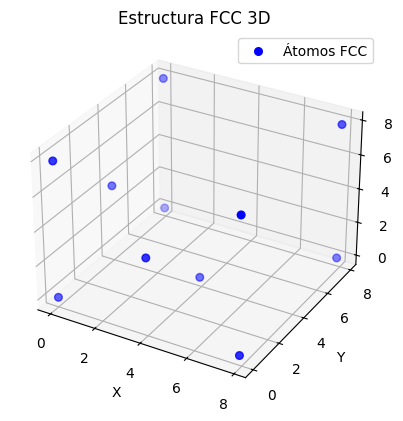

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones de la red FCC
celdas_largo = 2
celdas_alto = 2
celdas_profundidad = 2
a = 7.9  # Longitud de la celda unitaria

# Definir los vectores base de una celda unitaria FCC
base_fcc = np.array([[0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5]]) * a

# Crear las posiciones para las celdas unitarias
posiciones = list(base_fcc)
for i in range(celdas_largo):
    for j in range(celdas_alto):
        for k in range(celdas_profundidad):
          # Posiciones de átomos en cada celda FCC
          posiciones.append([i*a, j*a, k*a])

# Agregar átomos adicionales en la última fila y columna
# Última columna
"""for j in range(celdas_alto):
  for k in range(celdas_profundidad):
    x.append(celdas_largo * a)
    y.append(j * a + 0)  # Átomo en el vértice
    z.append(k * a + 0)
    x.append(celdas_largo * a)
    y.append(j * a + 0.5 * a)  # Átomo en el centro de la cara
    z.append(k * a + 0.5 * a)

# Última fila
for i in range(celdas_largo):
    for k in range(celdas_profundidad):
        x.append(i * a + 0)
        y.append(celdas_alto * a)
        z.append(k * a + 0)
        x.append(i * a + 0.5 * a)
        y.append(celdas_alto * a)
        z.append(k * a + 0.5 * a)

# Cara lateral (z = celdas_profundidad * a)
for i in range(celdas_largo):
    for j in range(celdas_alto):
        x.append(i * a + 0)
        y.append(j * a + 0)
        z.append(celdas_profundidad * a)
        x.append(i * a + 0.5 * a)
        y.append(j * a + 0.5 * a)
        z.append(celdas_profundidad * a)

# Añadir el átomo del vértice superior frontal derecho
x.append(celdas_largo * a)
y.append(celdas_alto * a)
z.append(celdas_profundidad * a)

#Añadir las otras esquinas faltantes
x.extend([0, celdas_largo * a, celdas_largo * a])
y.extend([celdas_alto * a, celdas_alto * a, 0])
z.extend([celdas_profundidad * a, 0, celdas_profundidad * a])"""

fcc_positions = np.array(posiciones)  # Matriz con posiciones FCC
num_atoms =fcc_positions.shape[0]
# Imprimir las posiciones
print (fcc_positions)
print(num_atoms)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the FCC atoms
ax.scatter(fcc_positions[:, 0], fcc_positions[:, 1], fcc_positions[:, 2], s=30, color='blue', label="Átomos FCC")

# Customize the plot (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Estructura FCC 3D')
ax.legend()

# Show the plot
plt.show()

# Creación de los iones que se van a adsorber

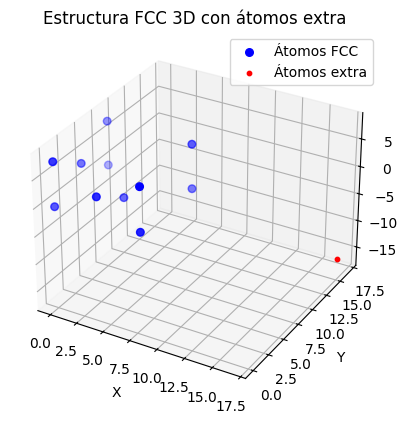

In [24]:
num_iones = 1  # Número de átomos extra que se colocarán al azar
x_lim = celdas_largo*a #Como es un cubo en general el limite es el mismo en todas las direcciones,
                      #Si tuviera dimensiones diferentes necesitaria y_lim y z_lim tambien

# Generar átomos adicionales en posiciones aleatorias por fuera de la superficie de la muestra
if np.random.rand() < 0.5:
    x_extra = np.random.uniform(-(x_lim + 0.3*Sigma), -(x_lim + 0.3*Sigma), num_iones)
else:
    x_extra = np.random.uniform(x_lim + 0.3*Sigma, x_lim + 0.3*Sigma, num_iones)

if np.random.rand() < 0.5:
    y_extra = np.random.uniform(-(x_lim + 0.3*Sigma), -(x_lim + 0.3*Sigma), num_iones)
else:
    y_extra = np.random.uniform(x_lim + 0.3*Sigma, x_lim + 0.3*Sigma, num_iones)
if np.random.rand() < 0.5:
    z_extra = np.random.uniform(-(x_lim + 0.3*Sigma), -(x_lim + 0.3*Sigma), num_iones)
else:
    z_extra = np.random.uniform(x_lim + 0.3*Sigma, x_lim + 0.3*Sigma, num_iones)


extra_positions = np.column_stack((x_extra, y_extra, z_extra))  # Matriz con posiciones de átomos extra

# Graficar las posiciones en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    fcc_positions[:, 0],
    fcc_positions[:, 1],
    fcc_positions[:, 2],
    color="blue",
    s=30,
    label="Átomos FCC",
)
ax.scatter(
    extra_positions[:, 0],
    extra_positions[:, 1],
    extra_positions[:, 2],
    color="red",
    s=10,
    label="Átomos extra",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Estructura FCC 3D con átomos extra")
ax.legend()
plt.show()

In [25]:
@tf.function
# Potencial de Lennard-Jones
def lennard_jones_potential(r, epsilon=Epsilon, sigma=Sigma):
    """
    Calcula el potencial de Lennard-Jones para una distancia r.
    """
    sigma = tf.cast(sigma, tf.float32)
    epsilon = tf.cast(epsilon, tf.float32)
    lj_term = (sigma / r)**12 - (sigma / r)**6
    return 4 * epsilon * lj_term + epsilon #Suma epsilon para desplazar el fondo del potencial a 0

# Función de costo para el modelo
def H_loss(Xh, Xt, epsilon=Epsilon, sigma=Sigma,lam_=1.0):
    """
    Calcula la energía total de las interacciones entre los iones (Xh) y la superficie (Xt),
    utilizando el potencial de Lennard-Jones.

    Parameters:
        Xh: tensor con posiciones de los iones (num_iones, 2)
        Xt: tensor con posiciones de los átomos de la superficie (num_superficie, 2)

    Returns:
        Energía promedio del sistema (escalar)
    """
    # Expandir dimensiones para obtener todas las combinaciones de distancias
    diff = tf.expand_dims(Xh, axis=1) - tf.expand_dims(Xt, axis=0)  # (num_iones, num_superficie, 2)
    r = tf.norm(diff, axis=-1)  # Distancia entre cada ion y cada átomo de la superficie (num_iones, num_superficie)

    # Evitar divisiones por cero
    r = tf.where(r == 0, 1e-10, r)

    # Calcular el potencial de Lennard-Jones para cada interacción
    lj_energy = lennard_jones_potential(r, epsilon, sigma)  # (num_iones, num_superficie)
    #reg_term = tf.reduce_sum(lj_energy/4*epsilon,axis=1)
    # Energía total para cada ion
    E_total = tf.reduce_sum(lj_energy, axis=1)  # Suma sobre los átomos de la superficie (num_iones)
    #print(E_total.shape)
    # Devolver la energía promedio del sistema
    energy_total = tf.reduce_mean(lam_*E_total)#+(1-lam_)*reg_term)  # Promedio sobre los iones (escalar)
    #print(energy_total.shape)
    return energy_total

In [26]:
#tensorflow data
ion = tf.Variable(extra_positions,dtype=tf.float32)
sample_atoms = tf.convert_to_tensor(fcc_positions,dtype=tf.float32)
#lam_LJ = 0.4
#lam_ = tf.constant(lam_LJ,dtype=tf.float32)


In [27]:
def exp_decay_lr(initial_lr, decay_rate, epoch):
    return initial_lr * decay_rate ** epoch

In [28]:
# Callback class
class EarlyStoppingCallback:
    def __init__(self, patience=5, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.wait = 0
        self.best_loss = float('inf')
        self.stopped_epoch = 0

    def on_epoch_end(self, epoch, loss):
        if loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                return True  # Signal to stop training
        return False  # Continue training

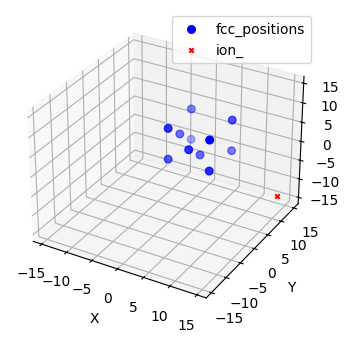

Epoch 1/200
Loss: 96.67074584960938 MeanGrad: [ 0.00044237  0.00044237 -0.00082565]


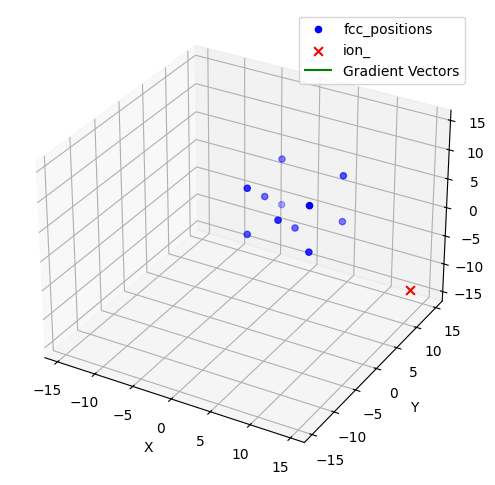

Epoch 2/200
Loss: 96.67058563232422 MeanGrad: [ 0.0004679   0.0004679  -0.00087952]


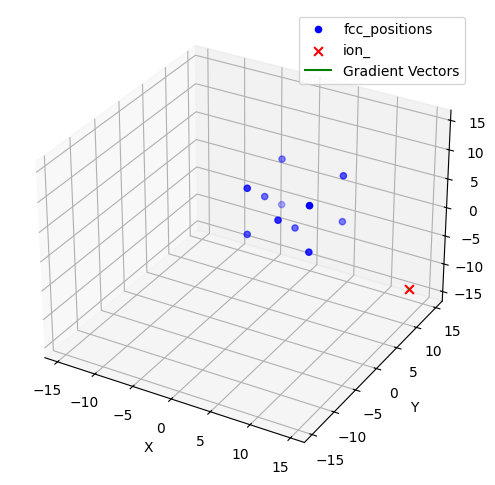

Epoch 3/200
Loss: 96.67039489746094 MeanGrad: [ 0.00049517  0.00049517 -0.0009376 ]


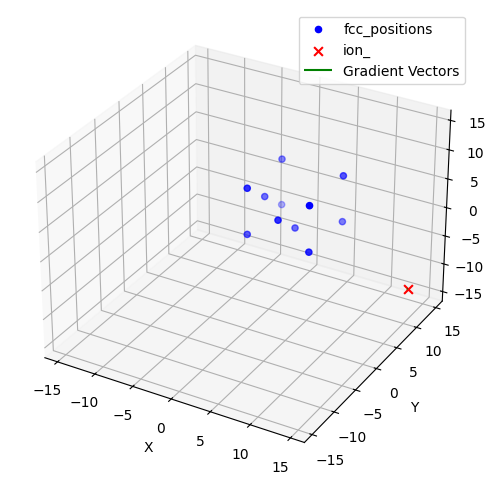

Epoch 4/200
Loss: 96.6701889038086 MeanGrad: [ 0.00052431  0.00052431 -0.00100028]


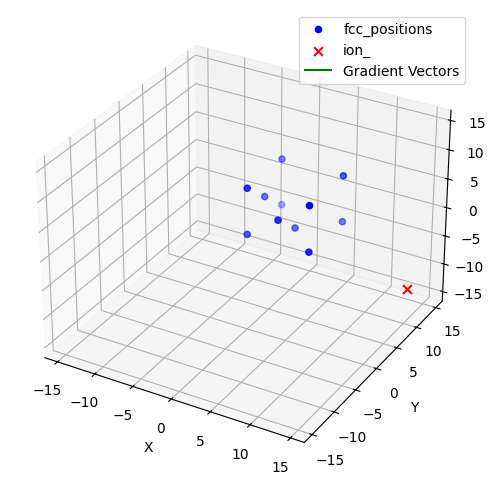

Epoch 5/200
Loss: 96.66998291015625 MeanGrad: [ 0.00055549  0.00055549 -0.001068  ]


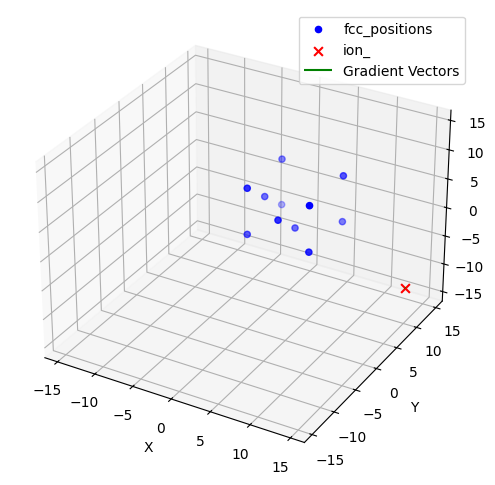

Epoch 6/200
Loss: 96.66975402832031 MeanGrad: [ 0.00058889  0.00058889 -0.00114127]


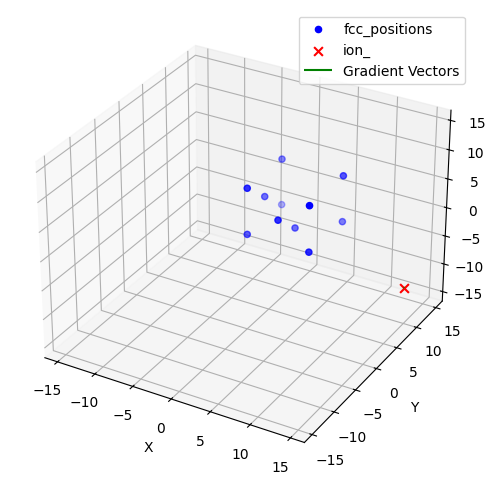

Epoch 7/200
Loss: 96.66950988769531 MeanGrad: [ 0.00062472  0.00062472 -0.00122067]


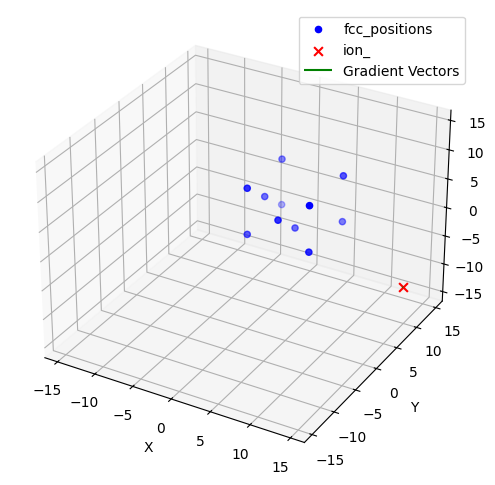

Epoch 8/200
Loss: 96.66925048828125 MeanGrad: [ 0.00066319  0.00066319 -0.00130687]


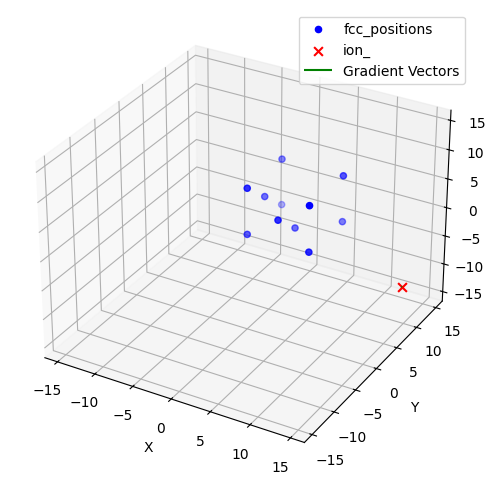

Epoch 9/200
Loss: 96.66897583007812 MeanGrad: [ 0.00070456  0.00070456 -0.00140061]


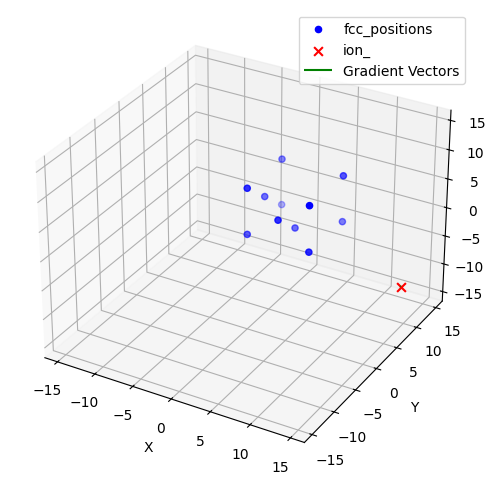

Epoch 10/200
Loss: 96.6686782836914 MeanGrad: [ 0.00074912  0.00074912 -0.00150273]


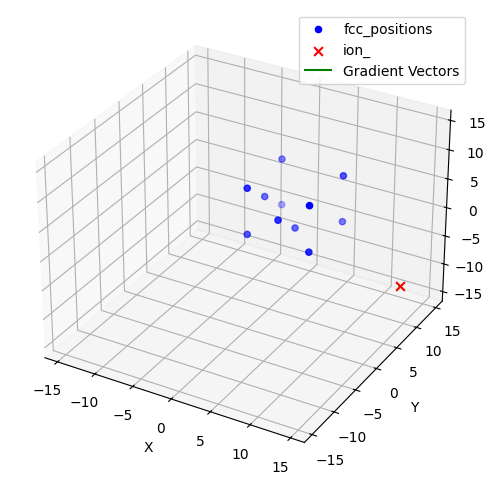

Epoch 11/200
Loss: 96.66835021972656 MeanGrad: [ 0.00079718  0.00079718 -0.00161418]


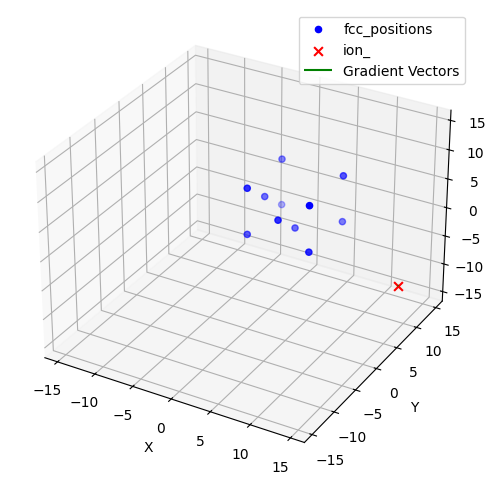

Epoch 12/200
Loss: 96.66800689697266 MeanGrad: [ 0.00084909  0.00084909 -0.00173606]


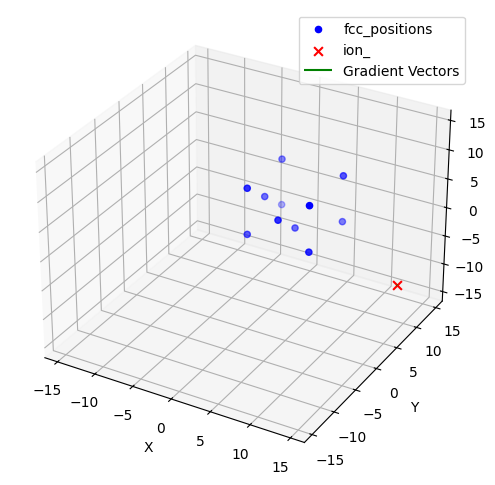

Epoch 13/200
Loss: 96.66763305664062 MeanGrad: [ 0.00090525  0.00090525 -0.00186961]


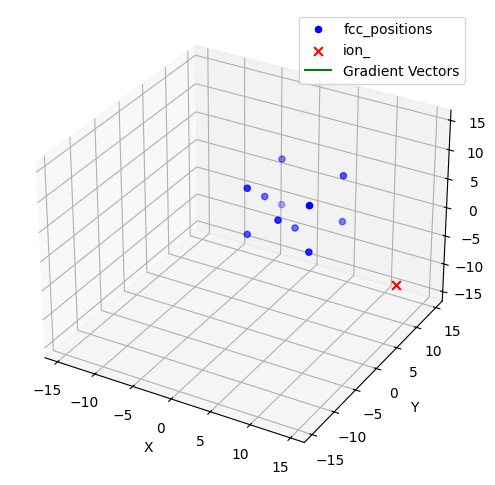

Epoch 14/200
Loss: 96.66722869873047 MeanGrad: [ 0.00096608  0.00096608 -0.00201623]


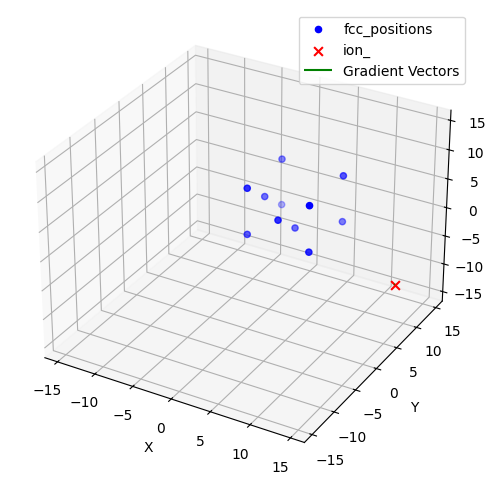

Epoch 15/200
Loss: 96.66679382324219 MeanGrad: [ 0.00103209  0.00103209 -0.00217753]


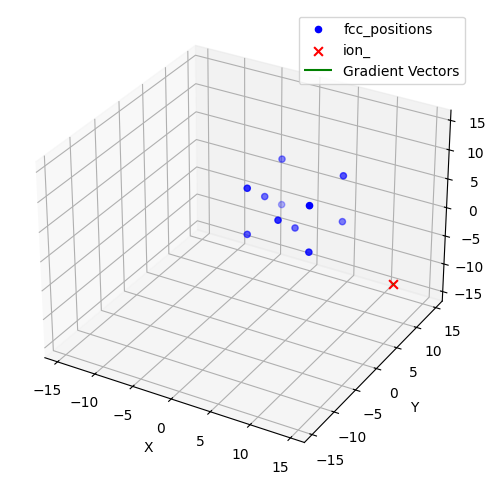

Epoch 16/200
Loss: 96.66632080078125 MeanGrad: [ 0.00110383  0.00110383 -0.00235537]


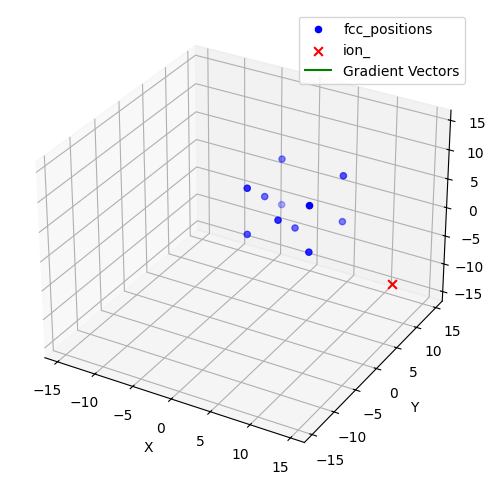

Epoch 17/200
Loss: 96.66580200195312 MeanGrad: [ 0.0011819   0.0011819  -0.00255187]


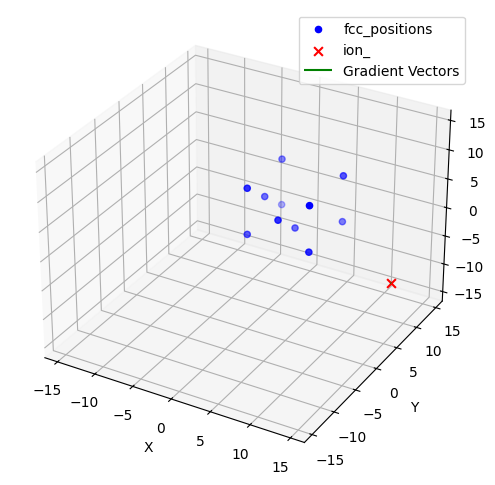

Epoch 18/200
Loss: 96.66523742675781 MeanGrad: [ 0.00126699  0.00126699 -0.00276946]


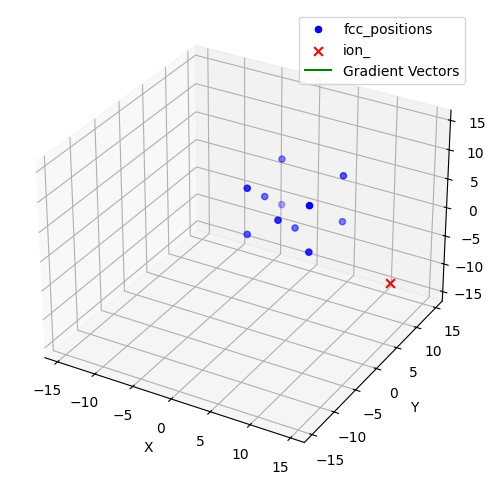

Epoch 19/200
Loss: 96.66461944580078 MeanGrad: [ 0.00135989  0.00135989 -0.00301094]


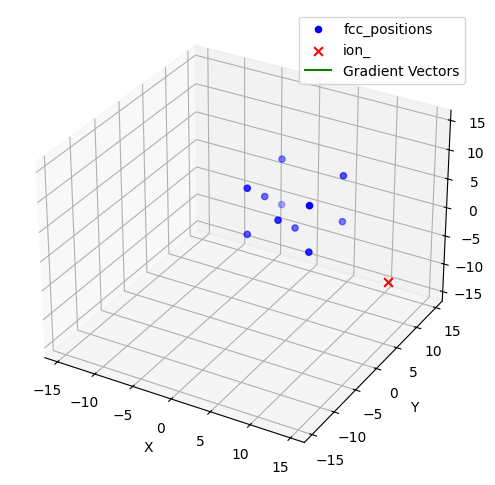

Epoch 20/200
Loss: 96.6639404296875 MeanGrad: [ 0.00146144  0.00146144 -0.00327955]


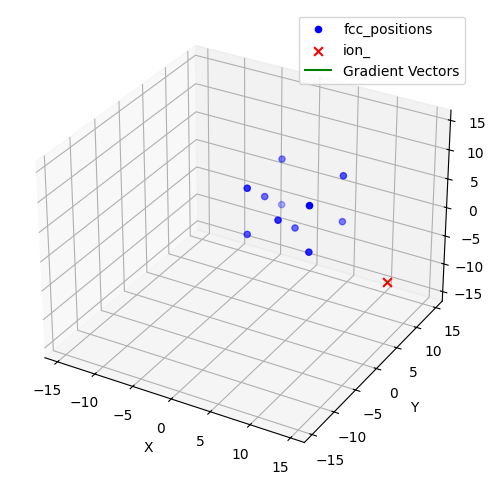

Epoch 21/200
Loss: 96.66321563720703 MeanGrad: [ 0.00157262  0.00157262 -0.00357903]


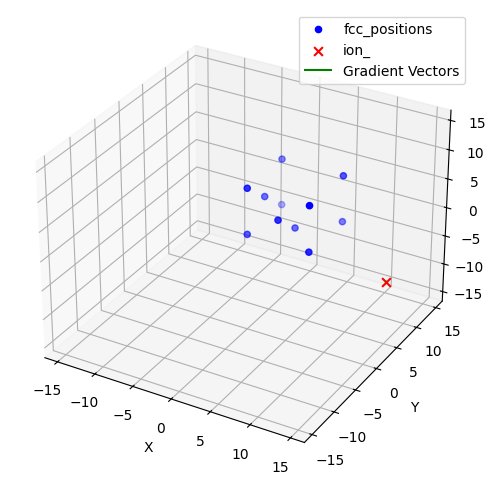

Epoch 22/200
Loss: 96.66239929199219 MeanGrad: [ 0.00169452  0.00169452 -0.00391371]


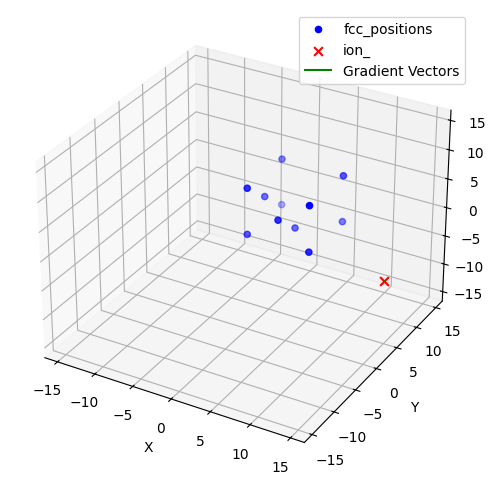

Epoch 23/200
Loss: 96.66151428222656 MeanGrad: [ 0.00182835  0.00182835 -0.00428862]


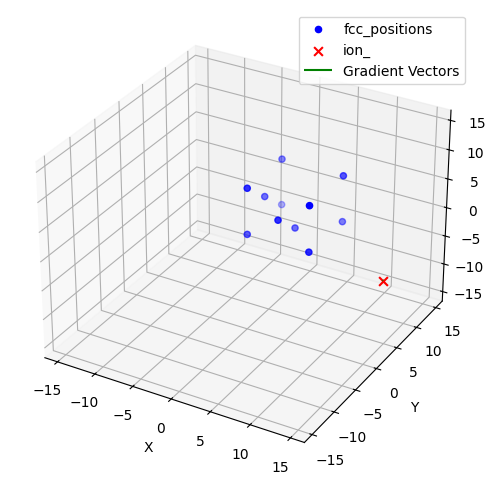

Epoch 24/200
Loss: 96.66053009033203 MeanGrad: [ 0.00197547  0.00197547 -0.00470962]


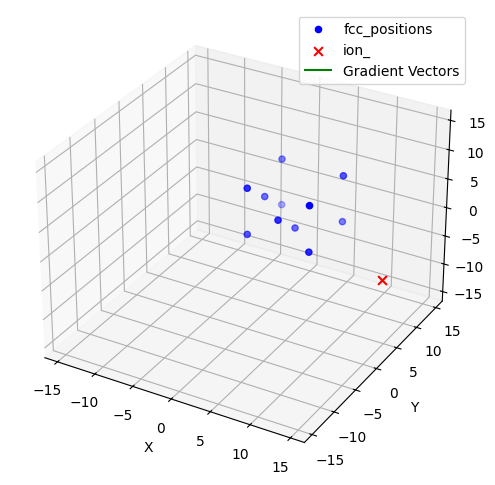

Epoch 25/200
Loss: 96.65943908691406 MeanGrad: [ 0.00213739  0.00213739 -0.00518352]


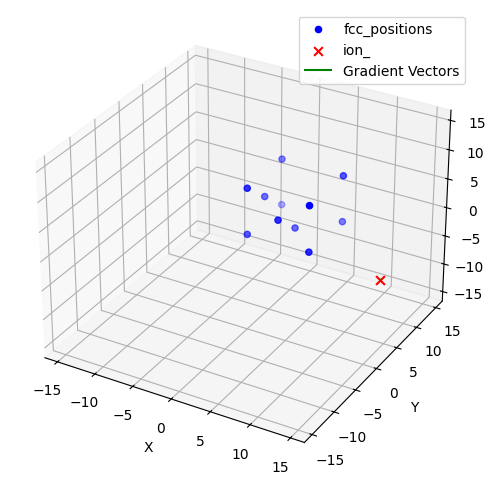

Epoch 26/200
Loss: 96.65823364257812 MeanGrad: [ 0.00231581  0.00231581 -0.00571825]


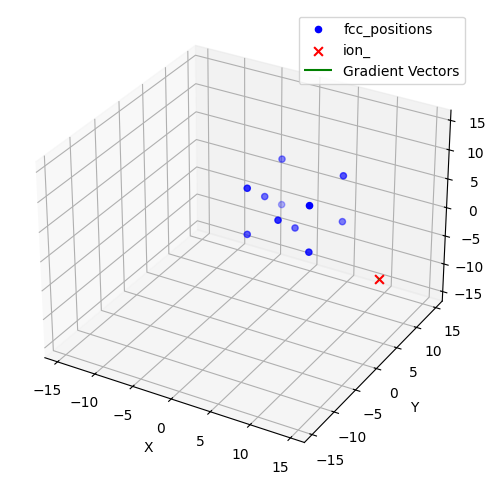

Epoch 27/200
Loss: 96.65691375732422 MeanGrad: [ 0.00251261  0.00251261 -0.00632314]


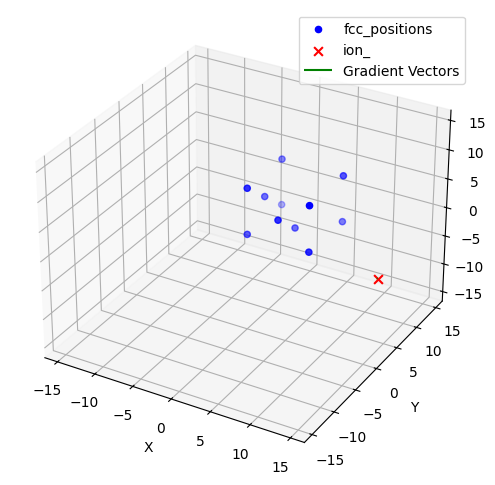

Epoch 28/200
Loss: 96.65542602539062 MeanGrad: [ 0.00272987  0.00272987 -0.00700905]


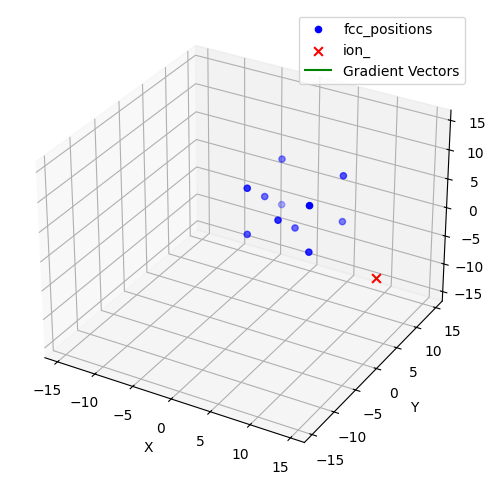

Epoch 29/200
Loss: 96.65377044677734 MeanGrad: [ 0.00296992  0.00296992 -0.00778877]


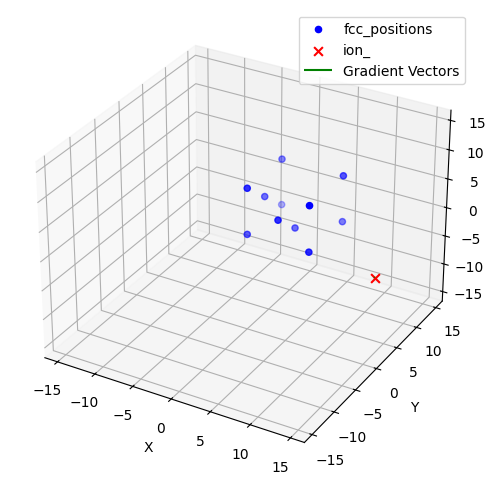

Epoch 30/200
Loss: 96.65193176269531 MeanGrad: [ 0.00323527  0.00323527 -0.00867729]


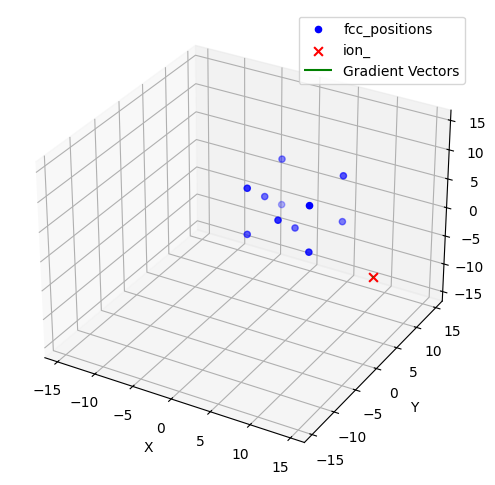

Epoch 31/200
Loss: 96.64986419677734 MeanGrad: [ 0.0035287   0.0035287  -0.00969227]


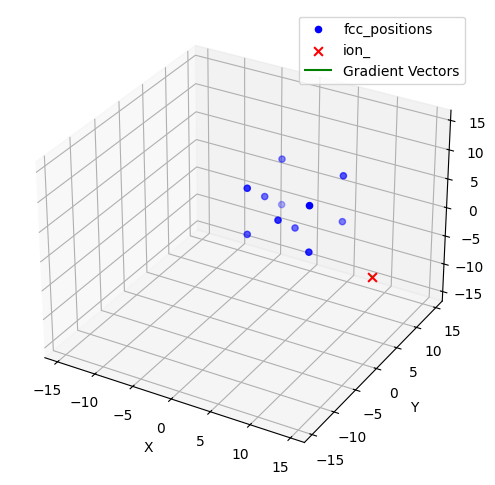

Epoch 32/200
Loss: 96.6475601196289 MeanGrad: [ 0.00385322  0.00385322 -0.01085447]


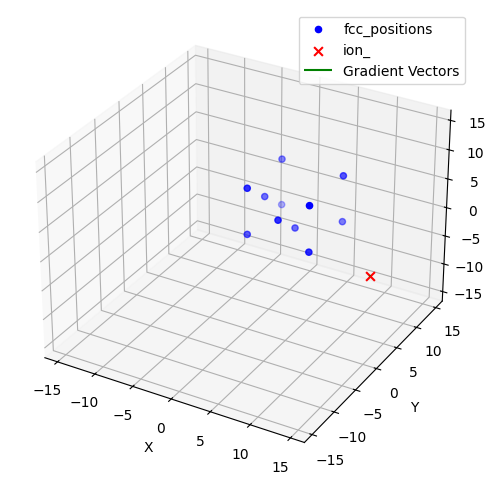

Epoch 33/200
Loss: 96.64495849609375 MeanGrad: [ 0.00421203  0.00421203 -0.01218839]


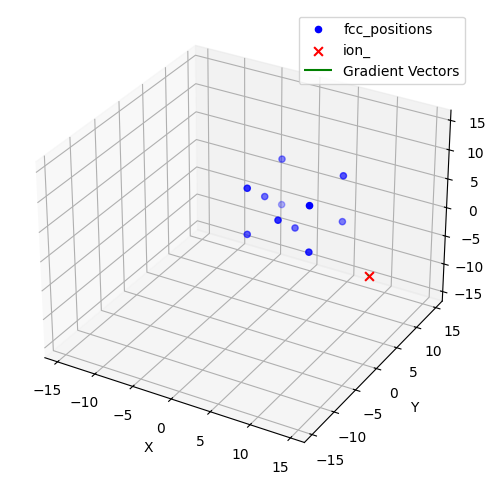

Epoch 34/200
Loss: 96.64202880859375 MeanGrad: [ 0.00460855  0.00460855 -0.01372289]


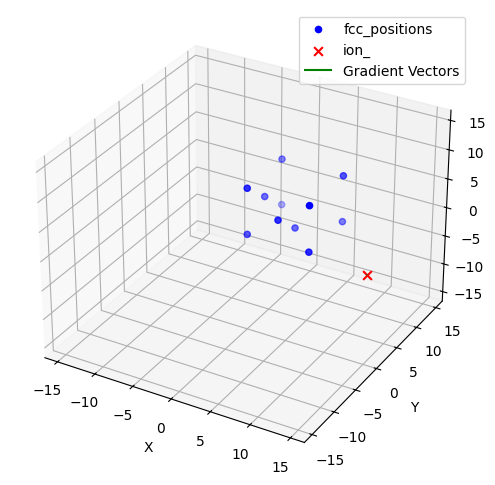

Epoch 35/200
Loss: 96.63873291015625 MeanGrad: [ 0.0050463   0.0050463  -0.01549208]


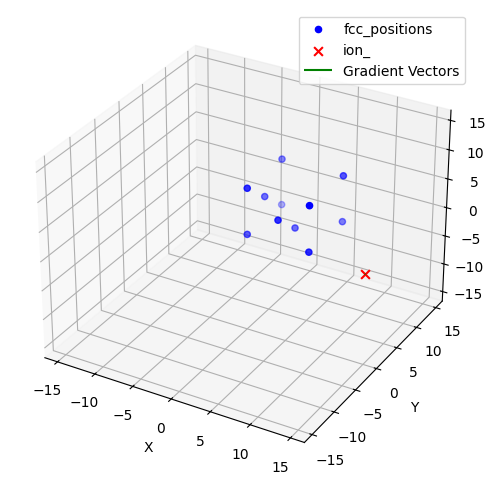

Epoch 36/200
Loss: 96.635009765625 MeanGrad: [ 0.00552886  0.00552886 -0.01753616]


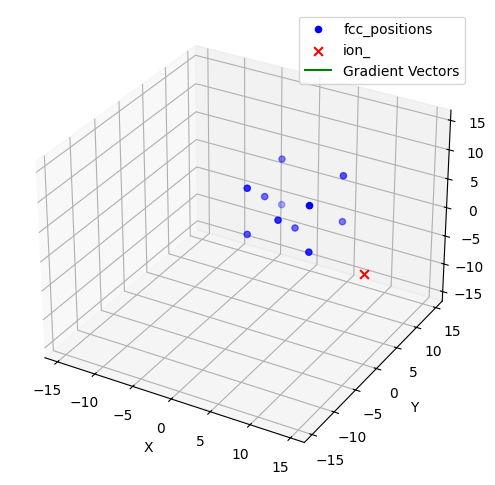

Epoch 37/200
Loss: 96.63079833984375 MeanGrad: [ 0.00605972  0.00605972 -0.01990257]


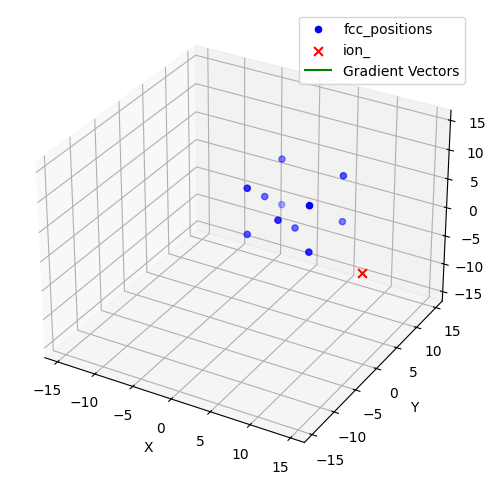

Epoch 38/200
Loss: 96.62600708007812 MeanGrad: [ 0.0066421   0.0066421  -0.02264724]


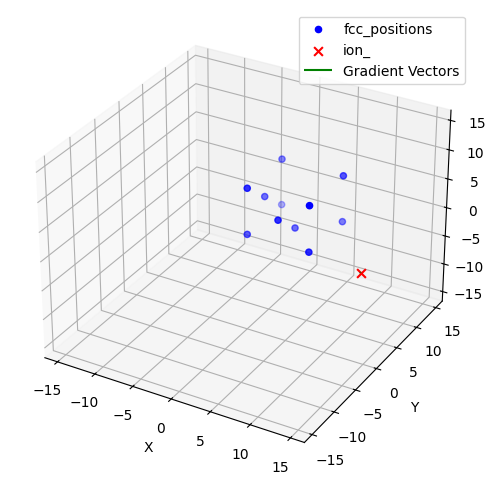

Epoch 39/200
Loss: 96.62057495117188 MeanGrad: [ 0.0072787   0.0072787  -0.02583604]


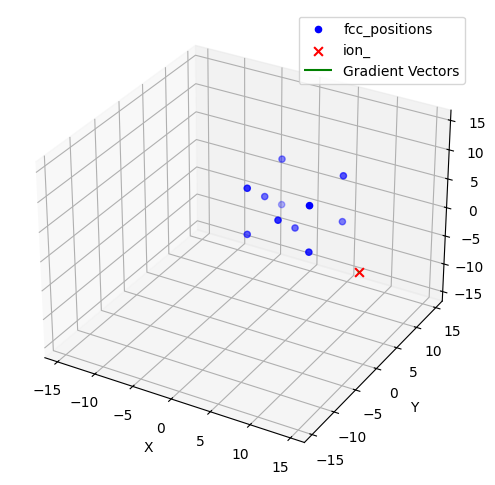

Epoch 40/200
Loss: 96.61439514160156 MeanGrad: [ 0.00797135  0.00797135 -0.02954641]


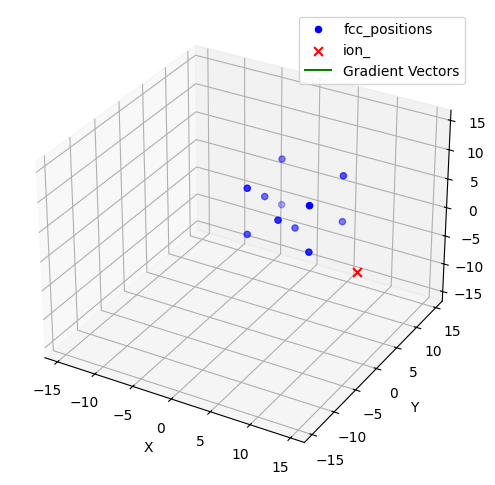

Epoch 41/200
Loss: 96.60736083984375 MeanGrad: [ 0.00872054  0.00872054 -0.03386909]


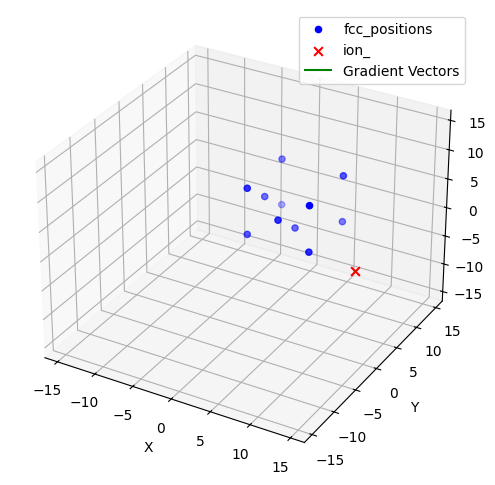

Epoch 42/200
Loss: 96.59932708740234 MeanGrad: [ 0.00952491  0.00952491 -0.03891021]


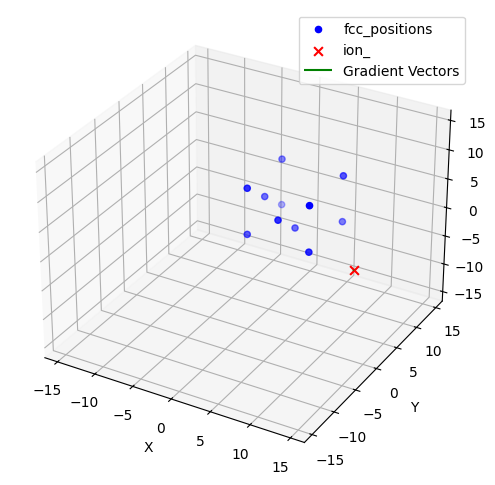

Epoch 43/200
Loss: 96.59016418457031 MeanGrad: [ 0.01038046  0.01038046 -0.04479329]


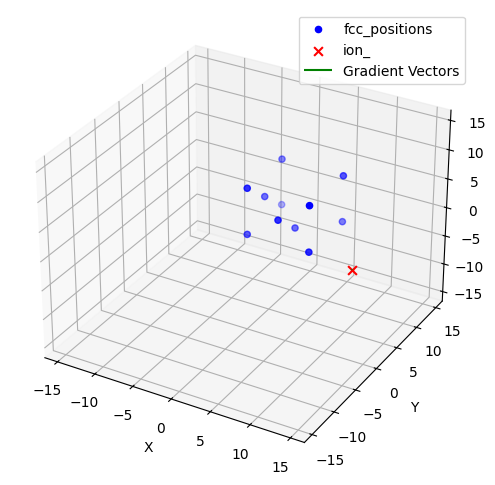

Epoch 44/200
Loss: 96.57967376708984 MeanGrad: [ 0.01127977  0.01127977 -0.05166147]


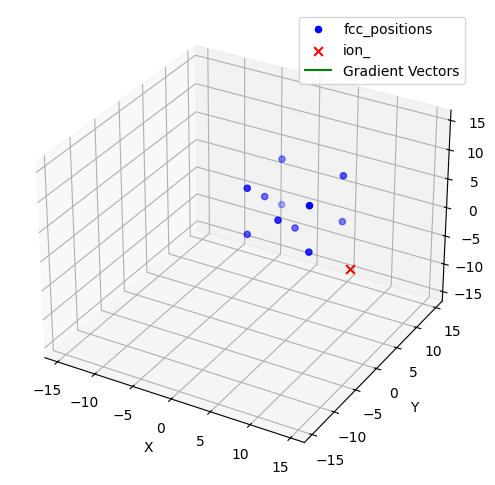

Epoch 45/200
Loss: 96.56768798828125 MeanGrad: [ 0.01221101  0.01221101 -0.05967946]


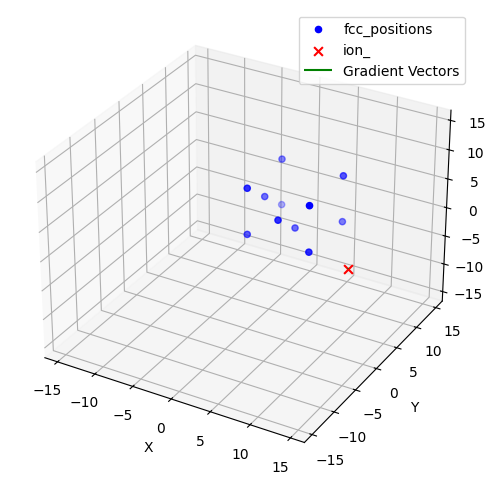

Epoch 46/200
Loss: 96.5539779663086 MeanGrad: [ 0.01315693  0.01315693 -0.06903555]


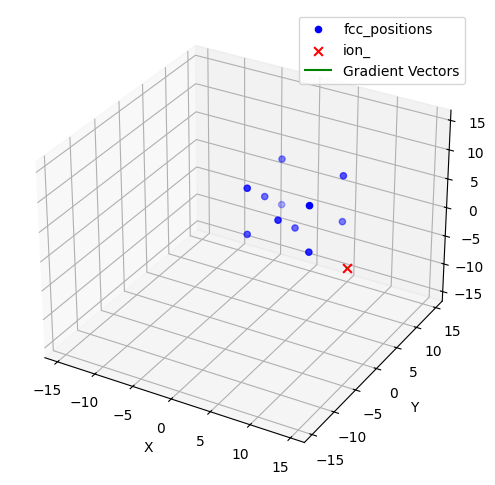

Epoch 47/200
Loss: 96.53828430175781 MeanGrad: [ 0.01409393  0.01409393 -0.07994319]


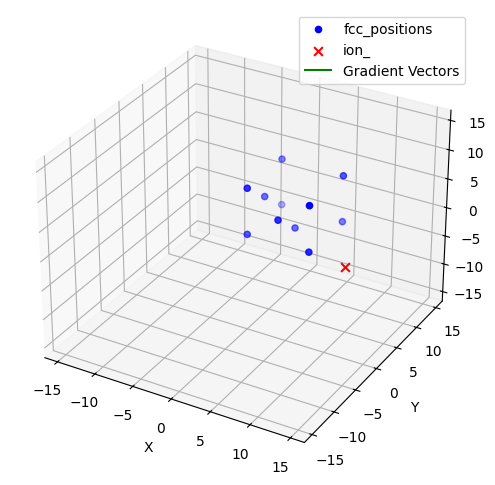

Epoch 48/200
Loss: 96.52033233642578 MeanGrad: [ 0.01499137  0.01499137 -0.09264217]


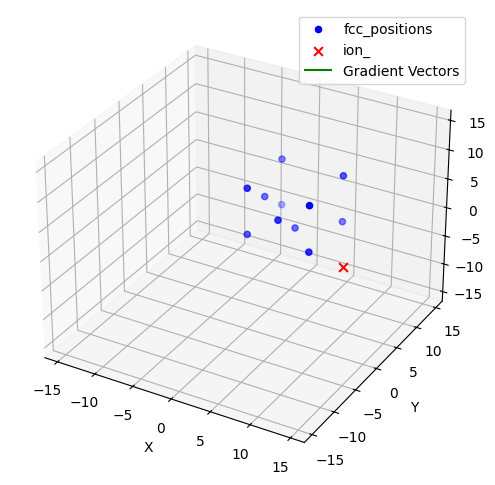

Epoch 49/200
Loss: 96.49978637695312 MeanGrad: [ 0.01581158  0.01581158 -0.10739908]


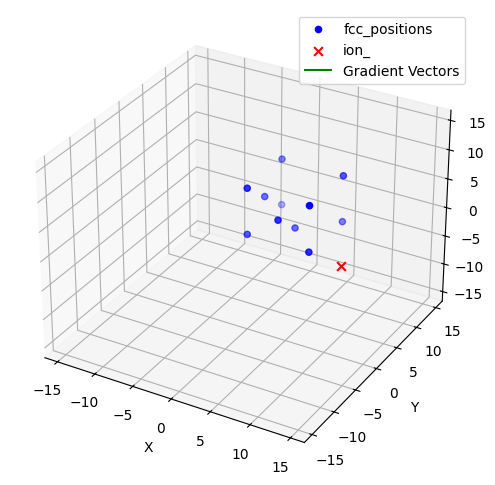

Epoch 50/200
Loss: 96.47631072998047 MeanGrad: [ 0.01651091  0.01651091 -0.12450764]


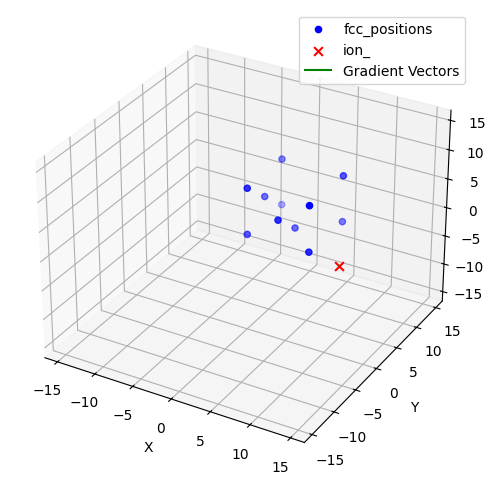

Epoch 51/200
Loss: 96.44950866699219 MeanGrad: [ 0.01704259  0.01704259 -0.14428888]


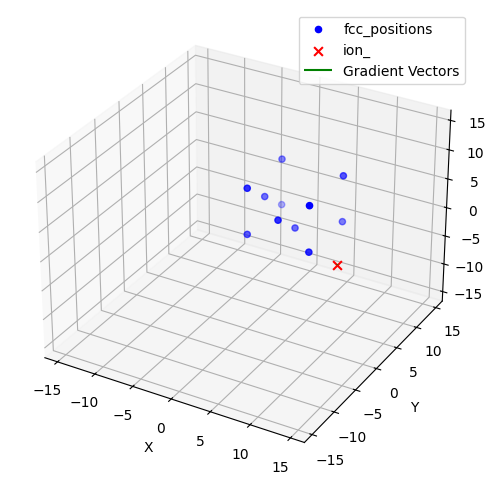

Epoch 52/200
Loss: 96.41891479492188 MeanGrad: [ 0.01736233  0.01736233 -0.1670929 ]


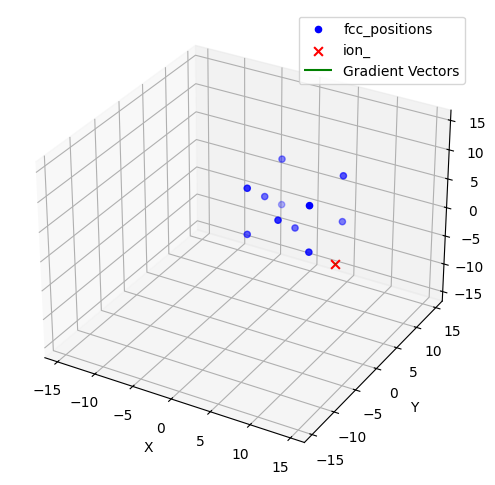

Epoch 53/200
Loss: 96.38404083251953 MeanGrad: [ 0.01743742  0.01743742 -0.19330372]


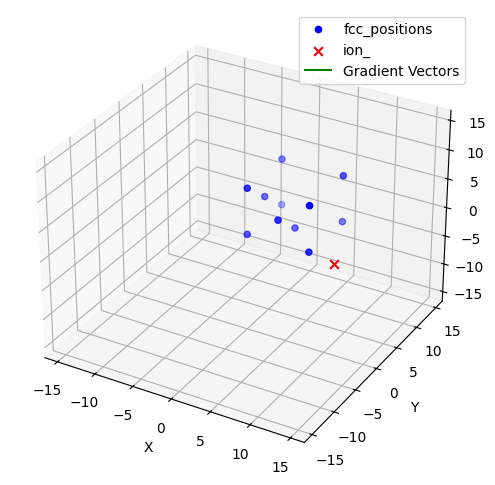

Epoch 54/200
Loss: 96.34432220458984 MeanGrad: [ 0.0172605   0.0172605  -0.22335178]


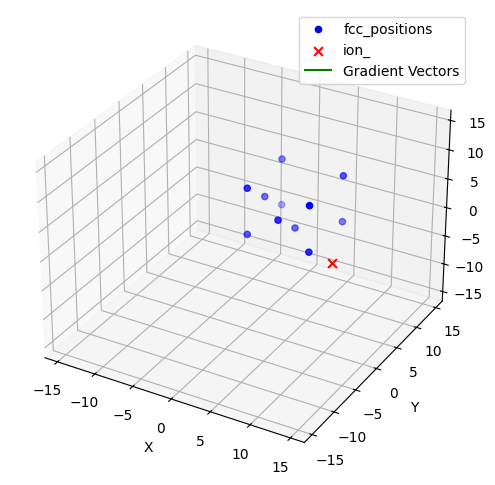

Epoch 55/200
Loss: 96.299072265625 MeanGrad: [ 0.01686831  0.01686831 -0.25773755]


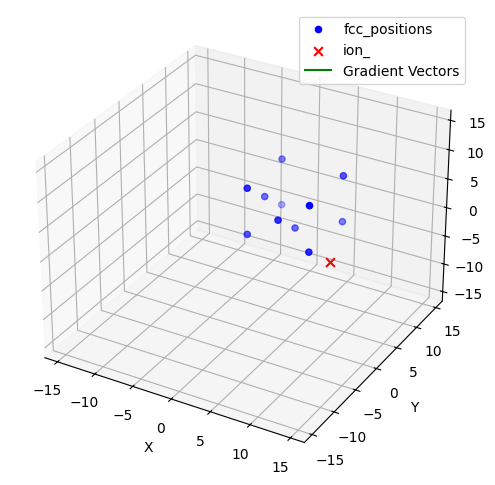

Epoch 56/200
Loss: 96.24752807617188 MeanGrad: [ 0.01636581  0.01636581 -0.29707566]


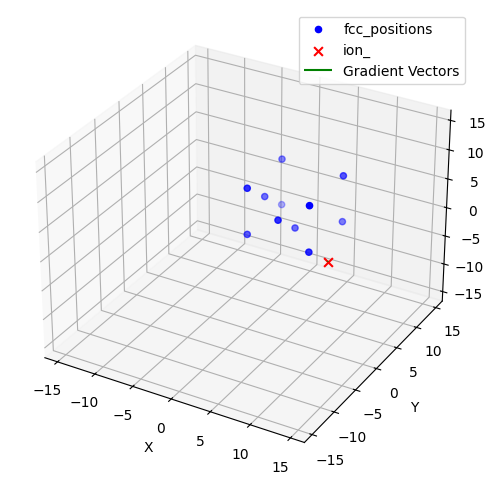

Epoch 57/200
Loss: 96.18867492675781 MeanGrad: [ 0.01595538  0.01595538 -0.34216377]


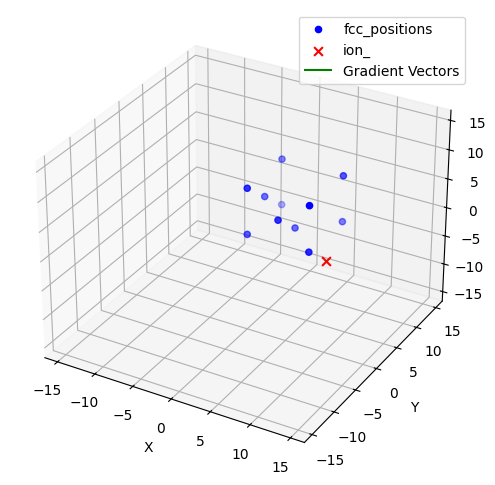

Epoch 58/200
Loss: 96.12126922607422 MeanGrad: [ 0.01597213  0.01597214 -0.39408794]


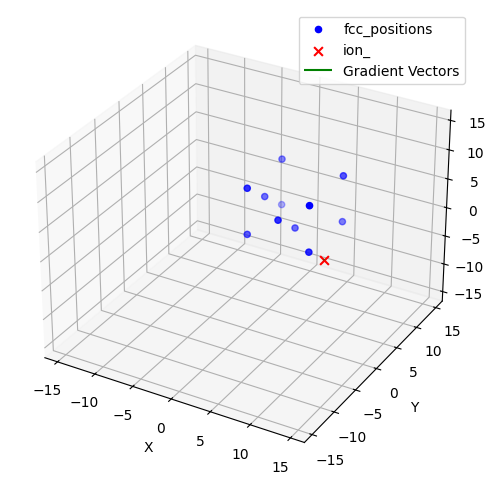

Epoch 59/200
Loss: 96.04367065429688 MeanGrad: [ 0.01692993  0.01692993 -0.45437595]


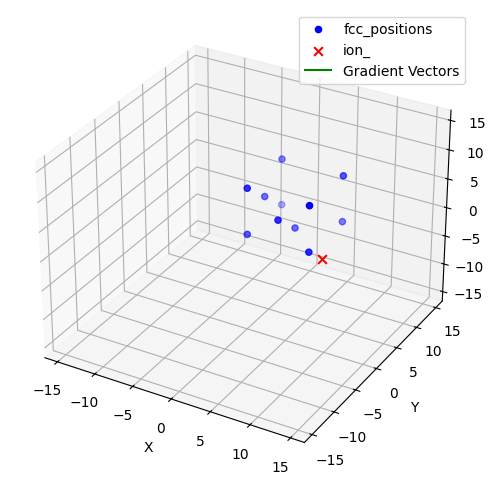

Epoch 60/200
Loss: 95.95367431640625 MeanGrad: [ 0.01958857  0.01958857 -0.52522784]


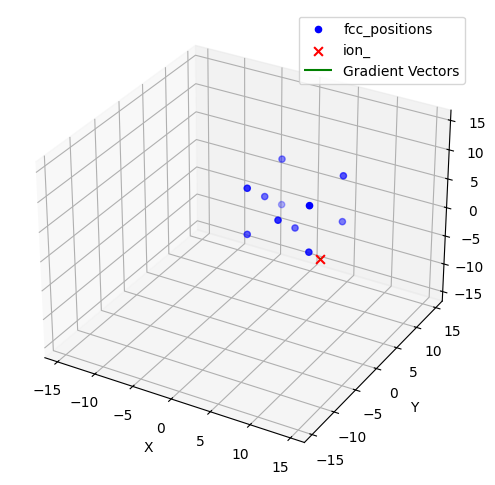

Epoch 61/200
Loss: 95.84828186035156 MeanGrad: [ 0.02505467  0.02505466 -0.60989326]


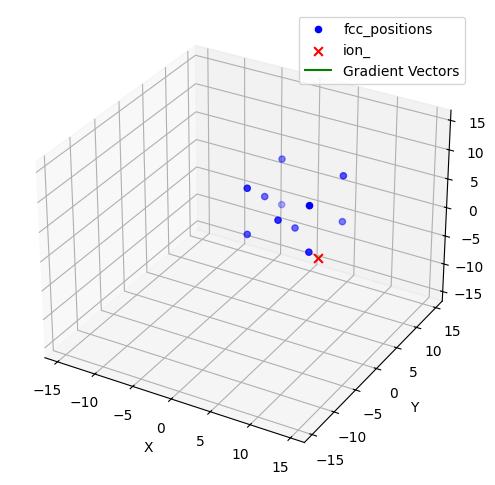

Epoch 62/200
Loss: 95.72317504882812 MeanGrad: [ 0.03489894  0.03489893 -0.7133224 ]


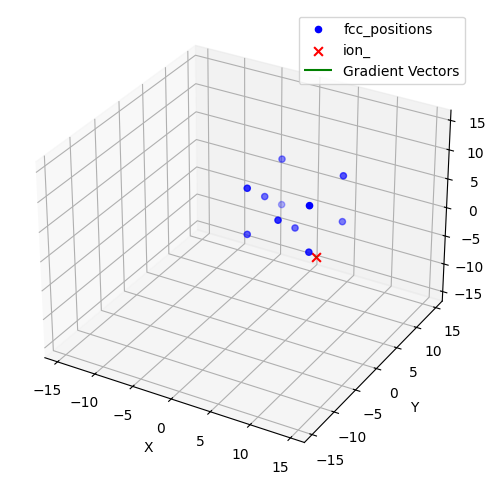

Epoch 63/200
Loss: 95.57229614257812 MeanGrad: [ 0.0511797   0.05117971 -0.8431688 ]


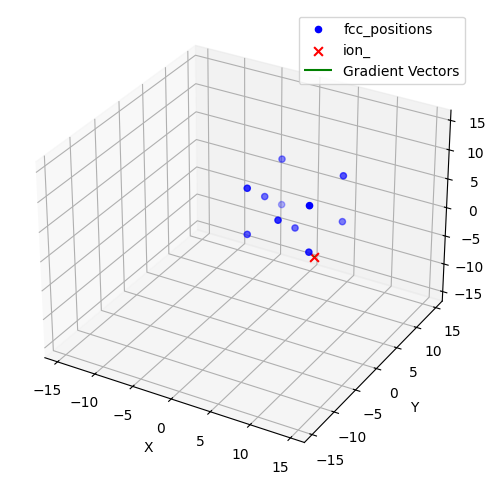

Epoch 64/200
Loss: 95.38711547851562 MeanGrad: [ 0.07618397  0.07618397 -1.0108964 ]


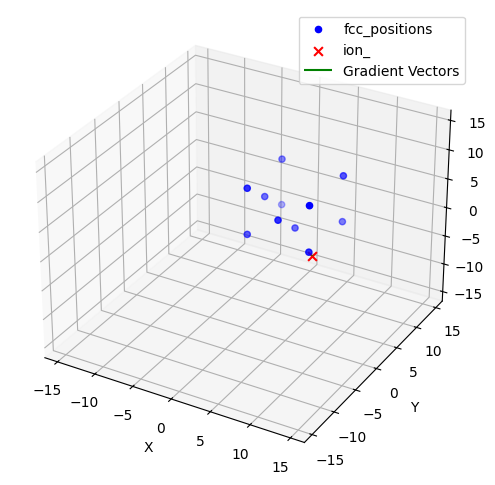

Epoch 65/200
Loss: 95.15631866455078 MeanGrad: [ 0.11198556  0.11198553 -1.2324988 ]


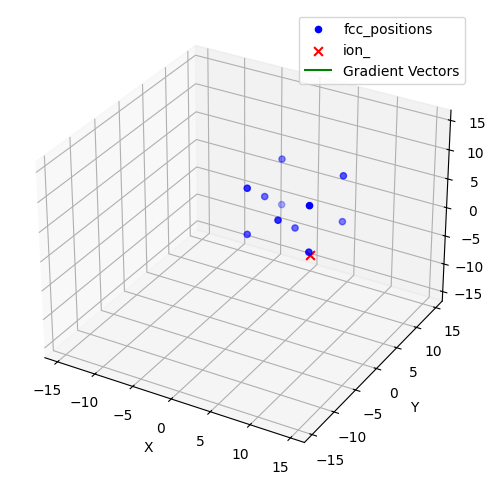

Epoch 66/200
Loss: 94.86508178710938 MeanGrad: [ 0.1602081  0.1602081 -1.5293355]


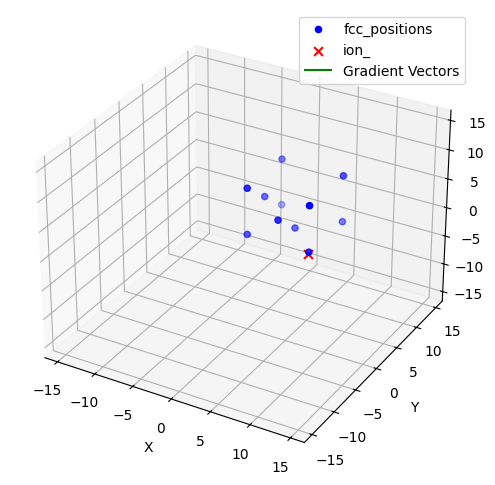

Epoch 67/200
Loss: 94.49382781982422 MeanGrad: [ 0.22159941  0.2215994  -1.9296875 ]


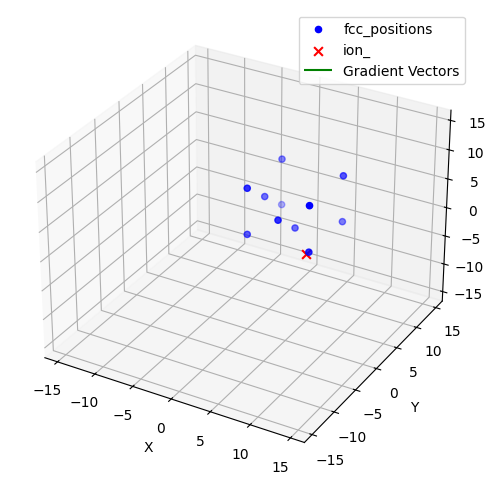

Epoch 68/200
Loss: 94.01703643798828 MeanGrad: [ 0.29457814  0.29457814 -2.469517  ]


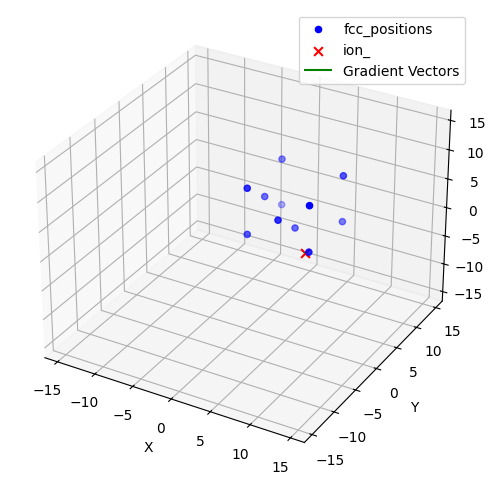

Epoch 69/200
Loss: 93.40332794189453 MeanGrad: [ 0.3724074   0.37240744 -3.189374  ]


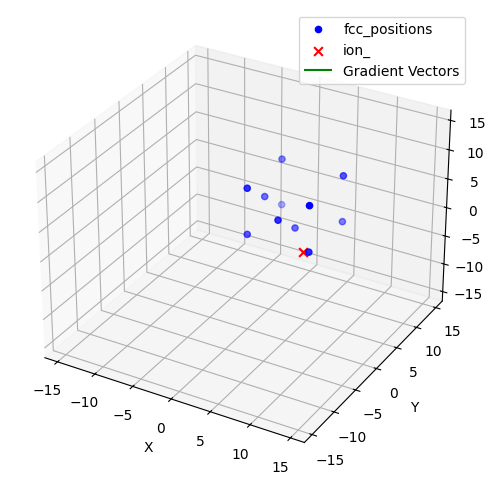

Epoch 70/200
Loss: 92.61770629882812 MeanGrad: [ 0.43897486  0.4389748  -4.1221175 ]


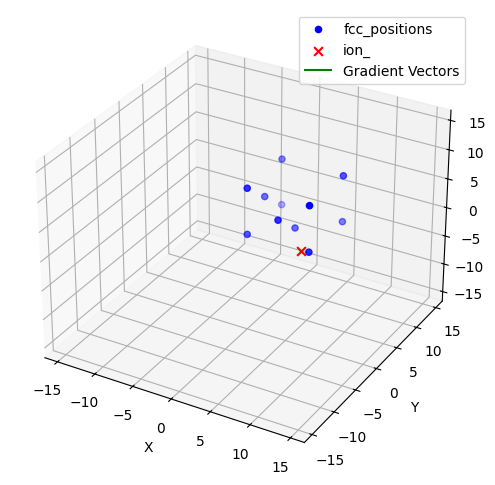

Epoch 71/200
Loss: 91.62910461425781 MeanGrad: [ 0.4641605   0.46416053 -5.2608905 ]


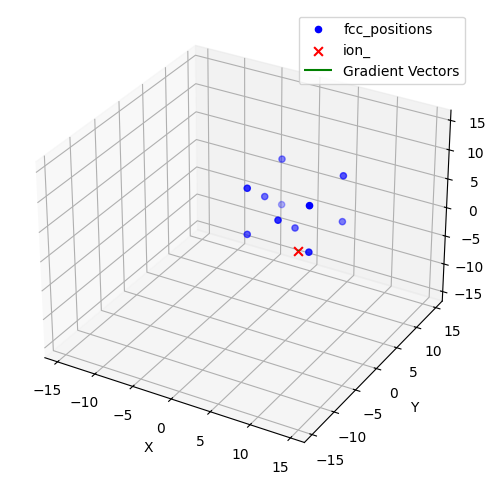

Epoch 72/200
Loss: 90.42752838134766 MeanGrad: [ 0.40370962  0.40370962 -6.488723  ]


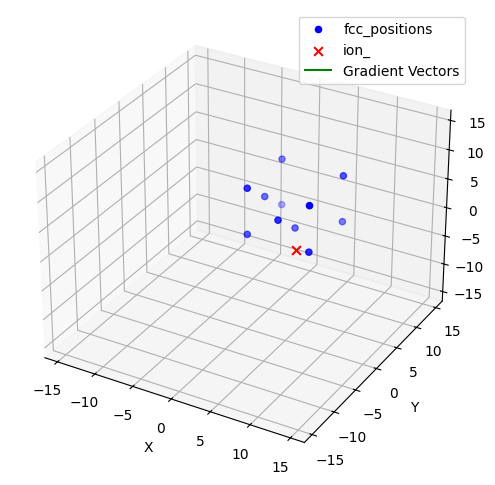

Epoch 73/200
Loss: 89.05697631835938 MeanGrad: [ 0.2193613   0.21936129 -7.446868  ]


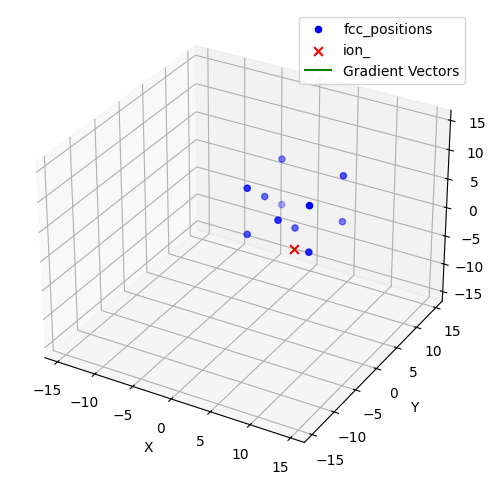

Epoch 74/200
Loss: 87.6623764038086 MeanGrad: [-0.04666477 -0.04666479 -7.3355904 ]


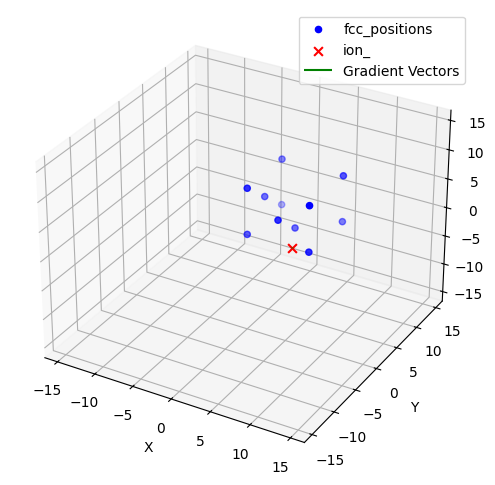

Epoch 75/200
Loss: 86.54263305664062 MeanGrad: [-0.12588874 -0.12588875 -4.577328  ]


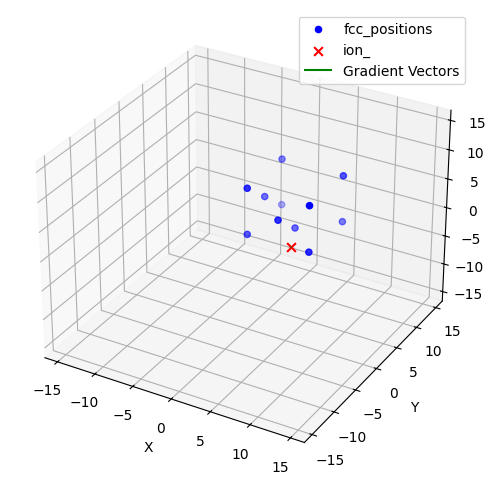

Epoch 76/200
Loss: 86.32255554199219 MeanGrad: [0.6382548 0.6382549 3.8969412]


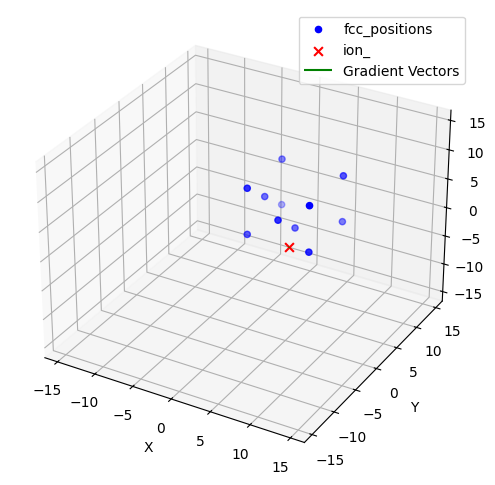

Epoch 77/200
Loss: 87.18789672851562 MeanGrad: [ 2.7001026  2.7001026 15.294759 ]


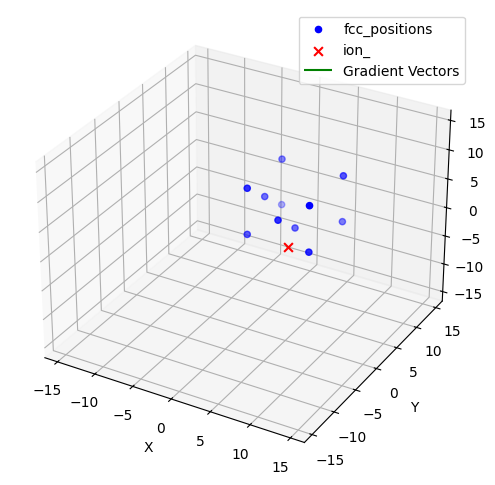

Epoch 78/200
Loss: 86.90020751953125 MeanGrad: [ 3.1533725  3.1533725 13.438494 ]


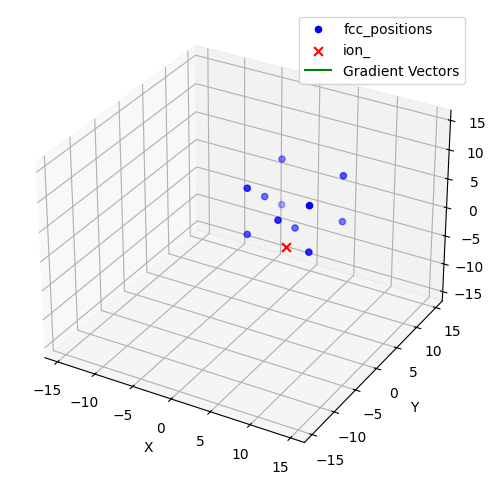

Epoch 79/200
Loss: 86.00985717773438 MeanGrad: [1.8338453 1.8338454 4.684759 ]


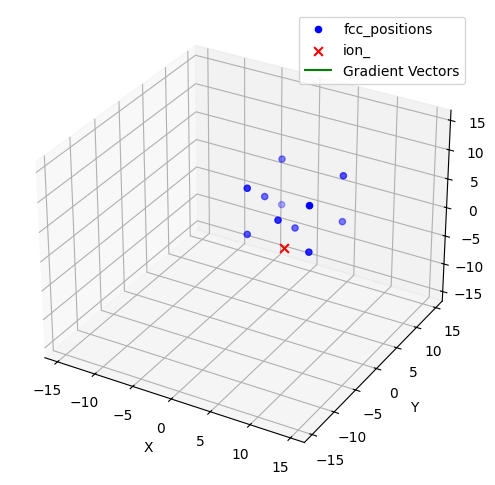

Epoch 80/200
Loss: 85.66181182861328 MeanGrad: [ 0.2897433   0.28974333 -2.210346  ]


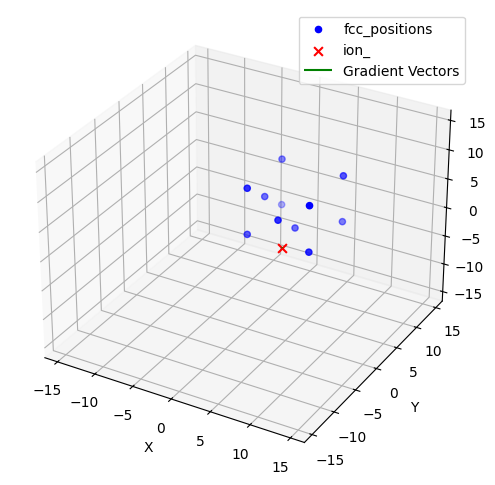

Epoch 81/200
Loss: 85.81604766845703 MeanGrad: [-0.67972827 -0.67972827 -5.5841994 ]


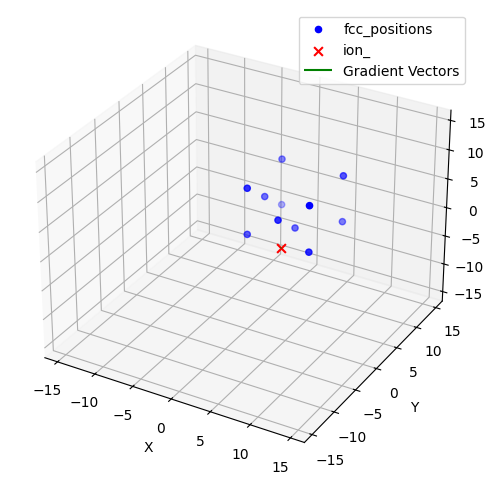

Epoch 82/200
Loss: 86.03679656982422 MeanGrad: [-1.1153435 -1.1153431 -6.8861966]


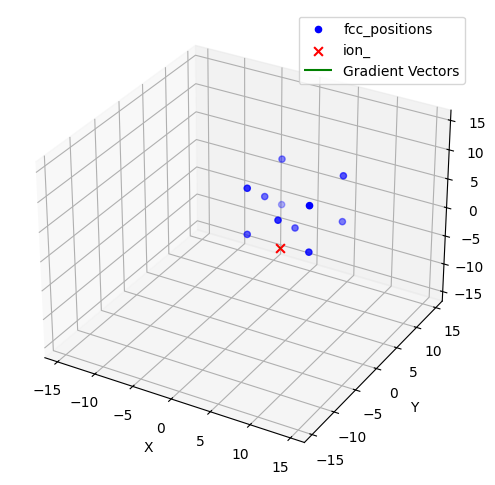

Epoch 83/200
Loss: 86.08484649658203 MeanGrad: [-1.2539138 -1.2539138 -7.329783 ]


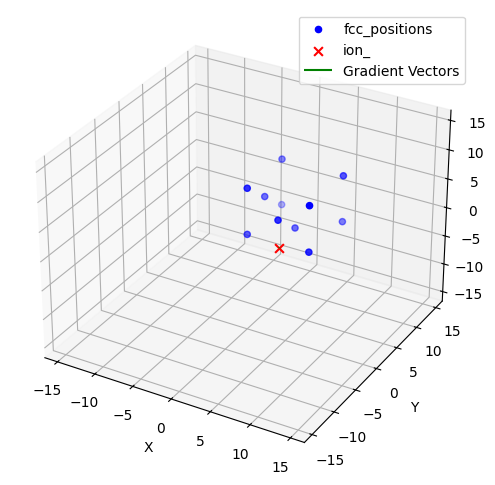

Epoch 84/200
Loss: 85.90774536132812 MeanGrad: [-1.2308164 -1.2308164 -7.4017854]


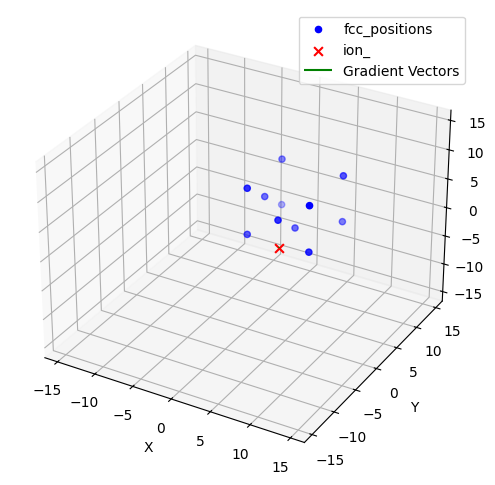

Epoch 85/200
Loss: 85.53511810302734 MeanGrad: [-1.0561645 -1.0561645 -7.1497602]


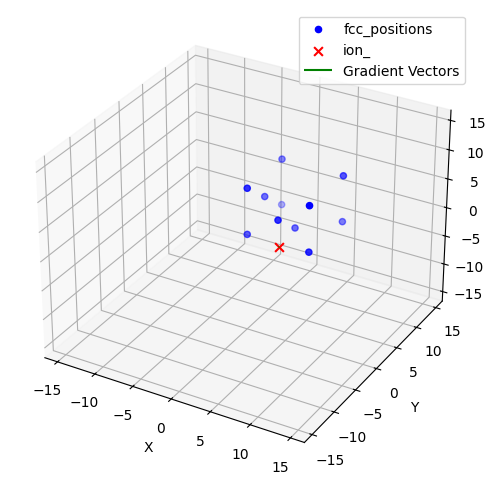

Epoch 86/200
Loss: 85.04693603515625 MeanGrad: [-0.62656724 -0.6265671  -6.3433867 ]


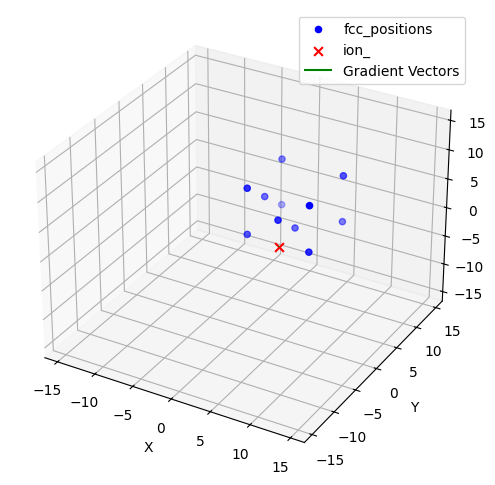

Epoch 87/200
Loss: 84.58487701416016 MeanGrad: [ 0.26149803  0.2614981  -4.5582604 ]


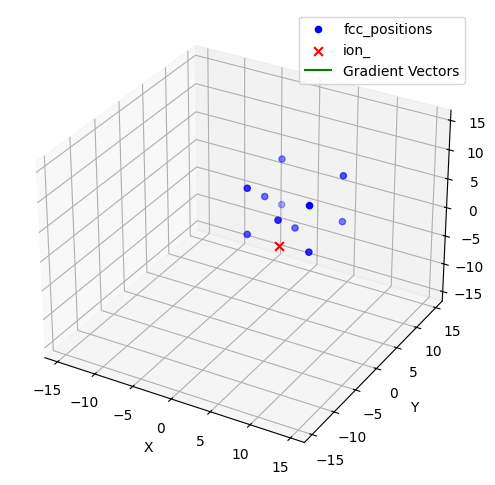

Epoch 88/200
Loss: 84.31002807617188 MeanGrad: [ 1.7393198  1.7393198 -1.6374274]


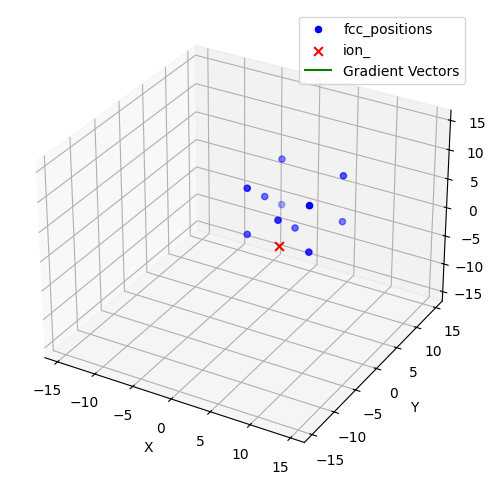

Epoch 89/200
Loss: 84.14981079101562 MeanGrad: [3.2878587  3.2878587  0.97142583]


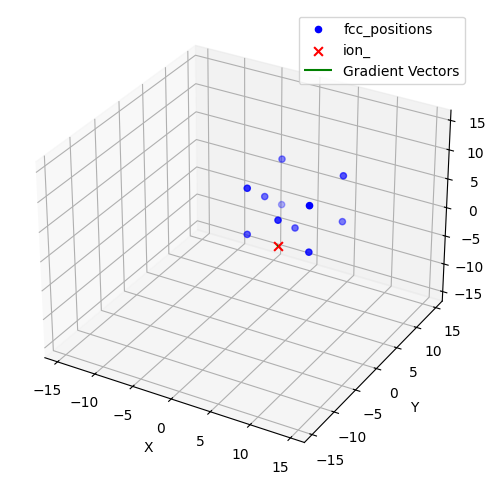

Epoch 90/200
Loss: 83.74215698242188 MeanGrad: [3.8030381 3.8030381 0.8474047]


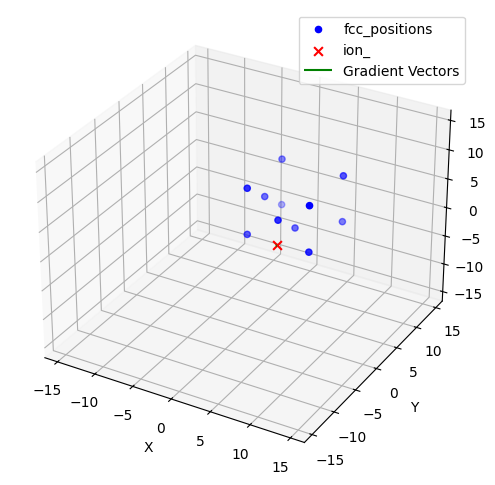

Epoch 91/200
Loss: 83.02168273925781 MeanGrad: [ 3.1320384  3.1320384 -1.7990181]


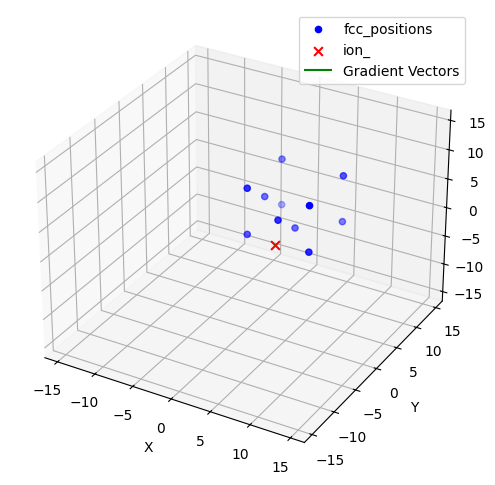

Epoch 92/200
Loss: 82.18940734863281 MeanGrad: [ 2.0776262  2.0776262 -4.9991856]


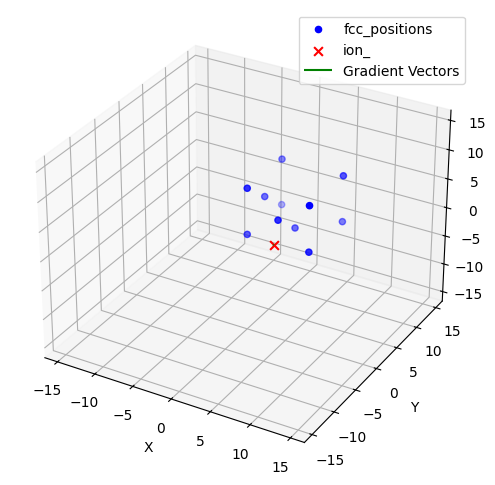

Epoch 93/200
Loss: 81.32158660888672 MeanGrad: [ 1.2589943  1.2589942 -7.481958 ]


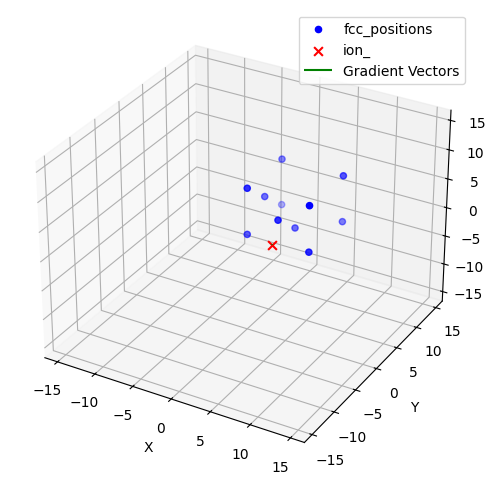

Epoch 94/200
Loss: 80.3840103149414 MeanGrad: [ 0.61921275  0.61921257 -8.832384  ]


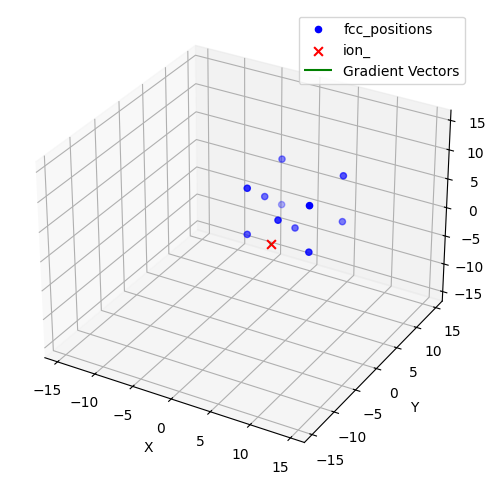

Epoch 95/200
Loss: 79.49249267578125 MeanGrad: [-0.6302073 -0.630207  -8.425974 ]


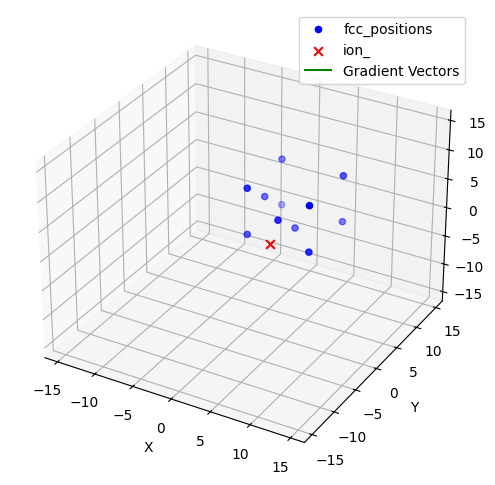

Epoch 96/200
Loss: 79.15986633300781 MeanGrad: [-4.091323  -4.0913224 -4.6657014]


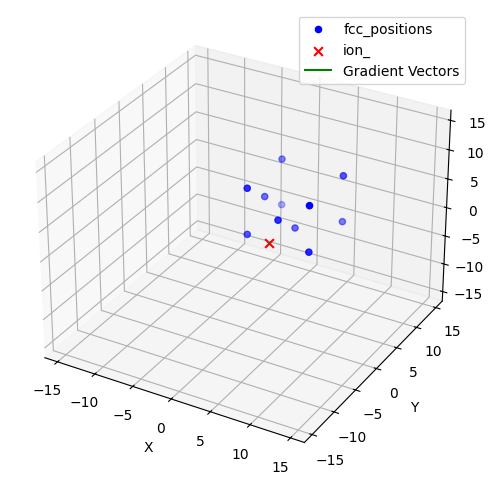

Epoch 97/200
Loss: 79.49286651611328 MeanGrad: [-9.24348   -9.24348    1.4102287]


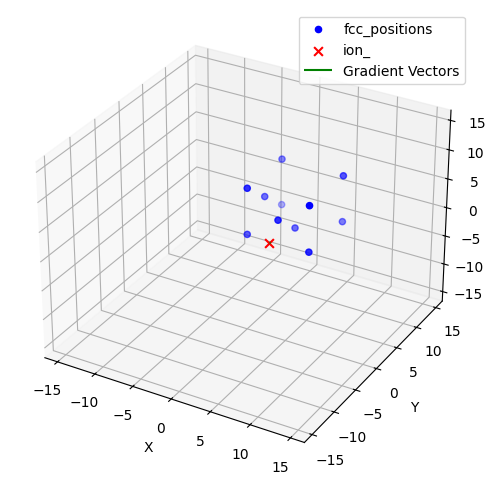

Epoch 98/200
Loss: 78.93582153320312 MeanGrad: [-9.852565 -9.852566  2.830806]


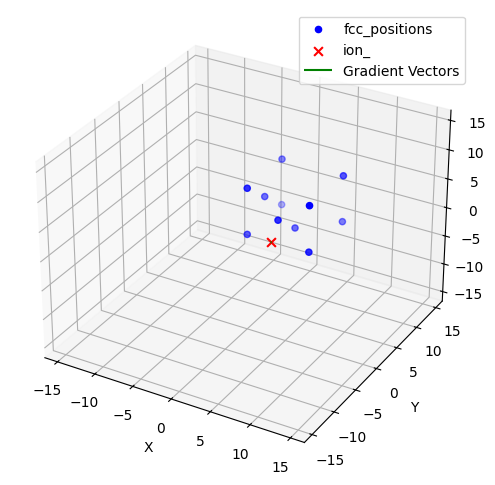

Epoch 99/200
Loss: 77.81465911865234 MeanGrad: [-4.538907 -4.538907  1.570242]


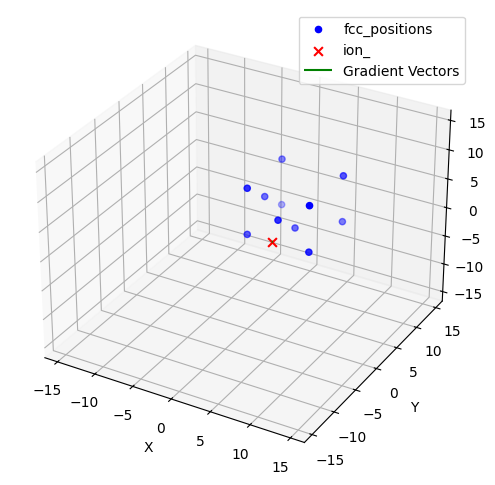

Epoch 100/200
Loss: 77.99637603759766 MeanGrad: [5.5115504 5.51155   4.645618 ]


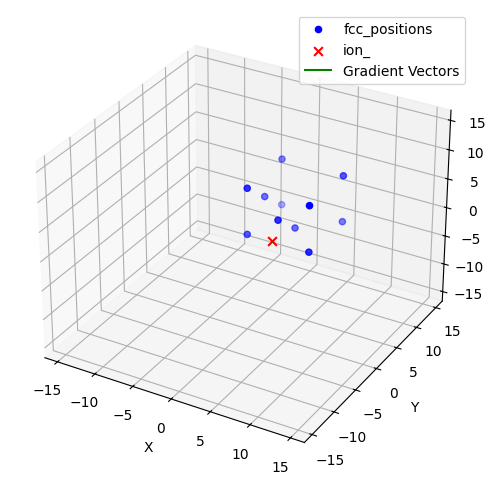

Epoch 101/200
Loss: 79.47935485839844 MeanGrad: [14.7884245 14.788422  11.266522 ]


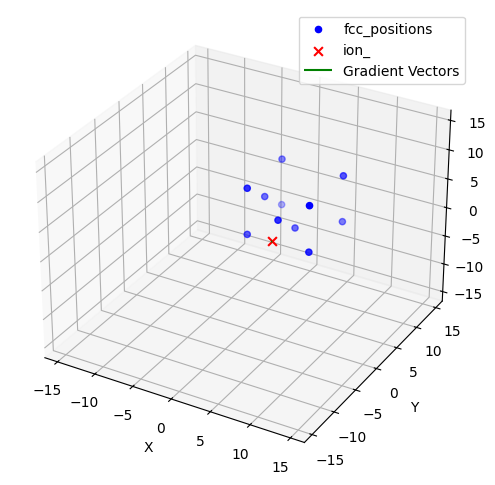

Epoch 102/200
Loss: 78.99981689453125 MeanGrad: [11.8421   11.842098  9.907621]


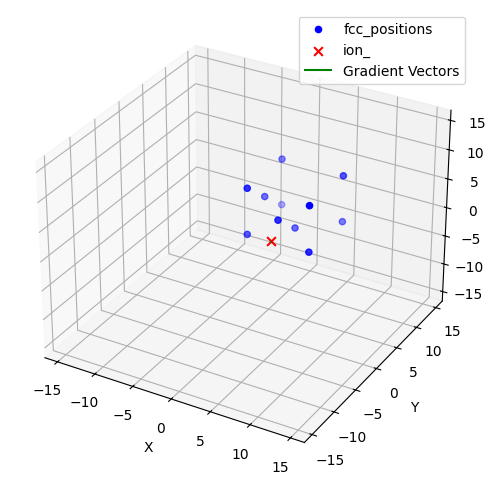

Epoch 103/200
Loss: 77.98576354980469 MeanGrad: [2.7636788 2.763677  5.9212213]


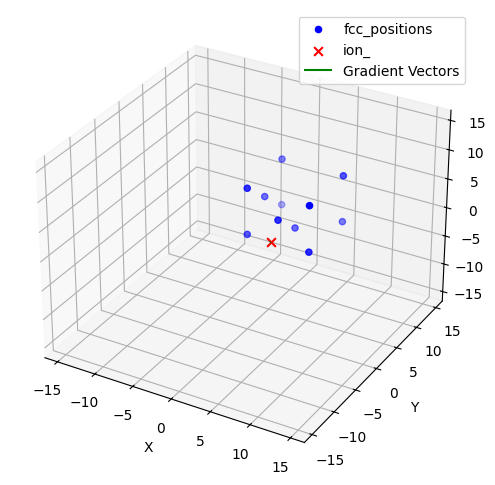

Epoch 104/200
Loss: 78.0216064453125 MeanGrad: [-5.284     -5.284001   5.0579925]
Early stopping at epoch 104


In [30]:
ion_ =  ion.numpy()
fig = plt.figure(figsize=(4, 4))  # Adjust figure size if needed
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fcc_positions[:, 0], fcc_positions[:, 1], fcc_positions[:, 2], c='b', s=30, label='fcc_positions')
ax.scatter(ion_[:, 0], ion_[:, 1], ion_[:, 2], c='r', s=10, marker='x', label='ion_')

ax.set_xlim([-(x_lim + 0.3*Sigma),x_lim + 0.3*Sigma])
ax.set_ylim([-(x_lim + 0.3*Sigma), x_lim + 0.3*Sigma])
ax.set_zlim([-(x_lim + 0.3*Sigma), x_lim + 0.3*Sigma])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()
# Custom training loop
eta0 = 0.1
batch_size = 256
epochs = 200
decay_rate = 0.20
optimizer = tf.keras.optimizers.Adam(learning_rate=eta0)
starting_pos =ion_.copy()

early_stopping = EarlyStoppingCallback(patience=5, min_delta=0.0001)

for epoch in range(epochs):
    print(f'Epoch {epoch+1}/{epochs}')
    eta = exp_decay_lr(eta0, decay_rate=decay_rate, epoch=epoch)
    #optimizer.learning_rate = eta
    for x_batch in tf.data.Dataset.from_tensor_slices(sample_atoms).shuffle(buffer_size=1024).batch(batch_size):

      with tf.GradientTape() as g:
        g.watch(ion)
        H_loss_ = H_loss(ion,x_batch)
      grad_ = g.gradient(H_loss_, ion)
      optimizer.apply_gradients(zip([grad_], [ion]))#El gradiente es muy peuqeño, quiza jugando con las unidades¿?
    print(f'Loss: {H_loss_.numpy()} MeanGrad: {tf.math.reduce_mean(grad_,axis=0).numpy()}')

    # Call the callback's on_epoch_end method
    if early_stopping.on_epoch_end(epoch, H_loss_.numpy()):
        print(f'Early stopping at epoch {early_stopping.stopped_epoch + 1}')
        last_loss = H_loss_.numpy()
        system_energy = last_loss-(num_atoms*num_iones*Epsilon)
        break

    ion_ =  ion.numpy()
    gradN = -10*eta0*grad_.numpy()

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(fcc_positions[:, 0], fcc_positions[:, 1], fcc_positions[:, 2], c='b', s=20, label='fcc_positions')
    ax.scatter(ion_[:, 0], ion_[:, 1], ion_[:, 2], c='r', s=40, marker='x', label='ion_')

    # For quiver, we need to create a 3D representation of the gradient
    # Assuming gradN is a 2D array (num_ions, 2)
    gradN_3D = np.zeros(gradN.shape,dtype=gradN.dtype)  # Initialize with zeros for z-component
    gradN_3D = gradN  # Copy x and y components from gradN

    ax.quiver(ion_[:, 0], ion_[:, 1], ion_[:, 2], gradN_3D[:, 0], gradN_3D[:, 1], gradN_3D[:, 2],
              color='g', length=0.1, normalize=True, label='Gradient Vectors')  # Adjust length and normalize as needed

    ax.set_xlim([-(x_lim + 0.3*Sigma),x_lim + 0.3*Sigma])
    ax.set_ylim([-(x_lim + 0.3*Sigma), x_lim + 0.3*Sigma])
    ax.set_zlim([-(x_lim + 0.3*Sigma), x_lim + 0.3*Sigma])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

    plt.show()

    if epoch+1==epochs:
      last_loss = H_loss_.numpy()
      system_energy = last_loss-(num_atoms*num_iones*Epsilon)

In [31]:
print(f'minima distancia para que no haya superposicion:{Sigma:.3f} A ',f'profundidad del pozo: {-Epsilon: .3f} j/mol')
print(f'Atomos en la muestra:{num_atoms}',f'Iones a adsorber:{num_iones}')
print(f'energía del sistema:{system_energy:.3f} j/mol',f'minima energía posible: {-Epsilon*num_atoms*num_iones:.3f} j/mol')
print(f'distance traveled: {ion_-starting_pos}')

minima distancia para que no haya superposicion:3.035 A  profundidad del pozo: -8.789 j/mol
Atomos en la muestra:11 Iones a adsorber:1
energía del sistema:-18.652 j/mol minima energía posible: -96.674 j/mol
distance traveled: [[-12.010669 -12.010669  12.096854]]
